In [70]:
cd '/content/drive/My Drive/machine_learning_cl/Mult_class_neural_networks'

/content/drive/My Drive/machine_learning_cl/Mult_class_neural_networks


#Input Data

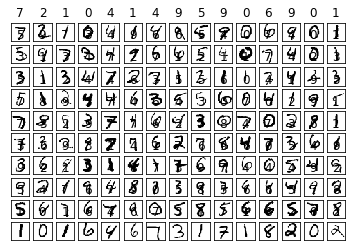

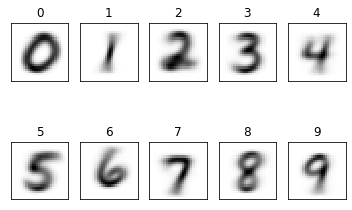

In [6]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


##Split data to (train images, train labels) and (test images, test labels)

In [0]:
numtrainimages = 6000
numtestimages = 4000
train_images  = np.empty((size_row * size_col, numtrainimages), dtype=float)
train_label  = np.empty(numtrainimages, dtype=int)
test_images  = np.empty((size_row * size_col, numtestimages), dtype=float)
test_label  = np.empty(numtestimages, dtype=int)

train_images = list_image[:, :numtrainimages]
train_label = list_label[:numtrainimages]
test_images = list_image[:, numtrainimages:]
test_label  = list_label[numtrainimages:]

# Neural Network Architecture

Object function \
$$
J(\theta)=\frac {1} {m} ​\sum_{i=1}^{m​}\sum_{k=0}^{k=9}​(−l_k^{(i)}​log(h_k^{(i)}​)−(1−l_k^{(i)}​)log(1−h_k{(i)}​))
$$

Gradient Descent
$$
\theta_k^{t+1} := \Theta_k^{t} - \alpha \frac{∂J(\theta^{(t)})} {∂\theta_k} \ for \ all \ k
$$

$$
\frac {\partial \delta} {\partial W_{a,k}} = (\sigma(h_k) - l)* \tilde{z_a} \\ a = 1,,, 49 \ k = 1,,,10 \\
\frac {\partial \delta} {\partial V_{b,k}} = (\sigma(h) - l)* W_{b,k} * (\sigma(z_k)(1-\sigma(z_k)) * \tilde{y_b} \\ b = 1,,,196 \ k = 1,,,49 \\ 
\frac {\partial \delta} {\partial U_k} = (\sigma(h) - l)* W_1 * (\sigma(z_1)(1-\sigma(z_1))* V_1 * (\sigma(y_1))(1-\sigma(y_1)) * x_1 \\ c = 1,,,784 \ k = 1,,,196
$$

In [0]:
# create label for one hot encoding
def label(num):
  label = np.zeros(10, dtype=int)
  label[num] = 1
  return label

def labels():
  labels = np.zeros((10,10), dtype = int)
  for i in range(10):
    labels[i, :] = label(i)
  return labels

l = labels() #10X10

In [0]:
#이미지 1개
def J(H, label): # 10*1 10*1
  cost = (-label)*(np.array([np.log(h) for h in H ])) 
  - (1-label)*(np.array([np.log(1-h) for h in H ]))
  cost = np.sum(cost)
  return cost
  
numX = 784
numY = 196
numZ = 49
numH = 10

In [0]:
#가장 처음 한 번만 실행
# initializing model parameters
np.random.seed(seed=100) #랜덤값 고정
U = np.random.normal(size=numY*(numX+1)).reshape(numX+1, numY)
V = np.random.normal(size=numZ*(numY+1)).reshape(numY+1, numZ)
W = np.random.normal(size=numH*(numZ+1)).reshape(numZ+1, numH)
past_itr = 0

#Learning training data

In [0]:
## weight 가져오기
import pickle
with open('weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)

In [0]:
#gradient descent
itr = 10
predicted_label = np.zeros(num_image, dtype=int)

##코드를 여러번 돌릴 때마다 accuracy array와 cost array 길이 늘리기
accuracy_array = np.zeros(past_itr+itr)
accuracy_array[:past_itr] = accuracy_array_t[:past_itr]
cost_array = np.zeros(past_itr+itr)
cost_array[:past_itr] = cost_array_t[:past_itr]
ln_rate = 0.02


In [23]:
import pickle
with open('weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array,file)
    pickle.dump(cost_array,file)

print(len(cost_array))

655


In [0]:
import pickle
with open('weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)


In [35]:
print(len(accuracy_array_t))

655


In [0]:
def model(numimages, image_vec, image_label, filename, itr):
  ## weight 가져오기
  import pickle
  with open(filename, 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
      U = pickle.load(file)
      V = pickle.load(file)
      W = pickle.load(file)
      past_itr = pickle.load(file)
      accuracy_array_t = pickle.load(file)
      cost_array_t = pickle.load(file)
  
  #gradient descent
  predicted_label = np.zeros(num_image, dtype=int)

  ##코드를 여러번 돌릴 때마다 accuracy array와 cost array 길이 늘리기
  accuracy_array = np.zeros(past_itr+itr)
  accuracy_array[:past_itr] = accuracy_array_t[:past_itr]
  cost_array = np.zeros(past_itr+itr)
  cost_array[:past_itr] = cost_array_t[:past_itr]
  ln_rate = 0.06

  for j in range(itr):#iteration 
    j = past_itr + j  #cost와 accuracy array의 index
    errors = 0 
    print("iteration:", j+1)
    for i in range(numimages): #6000개의 데이터  # image n개 #forward propagation
      X  = np.empty(((size_row * size_col),1), dtype=float)
      X = image_vec[:, i].reshape((size_row *  size_col), 1)
      l_indx = image_label[i] #int 
      Xt_nob = np.transpose(X)
    #  print("Xt_nob : ", Xt_nob)

      X0 = np.array([1]) #bias
      Xt = np.append(Xt_nob, X0) #앞에 붙여야 함
      Xt = Xt.reshape(1,size_row *  size_col+1) 
    #  print("Xt : ", Xt)
      Y = np.dot(Xt, U) #

      #activation function
      sigma = lambda x: 1/(1+(np.exp(-x)))
      vsigma = np.vectorize(sigma)

      Y_tilda_nob = vsigma(Y)
    #  print("Y_tilda_nob : ", Y_tilda_nob)

      Y0 = np.array([1])
      Y_tilda = np.append(Y_tilda_nob, Y0)
      Y_tilda = Y_tilda.reshape(1,numY+1)
    #  print("Y_tilda : ", Y_tilda)

      Z = np.dot(Y_tilda, V)
      Z_tilda_nob = vsigma(Z)
    #  print("Z_tilda_nob : ", Z_tilda_nob)

      Z0 = np.array([1])
      Z_tilda = np.append(Z_tilda_nob, Z0)
      Z_tilda = Z_tilda.reshape(1,numZ+1)
    #  print("Z_tilda : ", Z_tilda)
      H = np.dot(Z_tilda, W)
      H_tilda = vsigma(H)
    #  print("H_tilda : ", H_tilda)

      onehotencd = l[l_indx]

      ##error
      error = J(H_tilda, onehotencd)
      predicted_label[i] = np.argmax(H_tilda)
      errors += error
      #print(" error : ", error)
      #print(" predicted_label[i]", predicted_label[i])
      #print(" train_label", train_label[i])

      ##back propagation
      
      #print("W : ", W)
      ## W - 업데이트 49 X 10 - no bias 50*10 #Ztilda는 49개의 w 업데이트의 과정에서 고정
      Z_tilda_nob = Z_tilda_nob.reshape(49,1)
      redundant = (H_tilda - onehotencd).reshape(1,10 ) #1x10
      W[:49, :] = W[:49, :]- ln_rate * np.dot(Z_tilda_nob, redundant) # 49x10
      # 49X10 - 상수 * (49X1)(1X10).
      # 50X10 - 상수 * (49X1)(1X10).
      #print("W : ", W)
        
      ## V - 업데이트 196X49 197*
      z = vsigma(Z)*(1-vsigma(Z))
      redundantS2 = np.zeros((1,49))

      #print("V : ", V)
      for i in range(49):
        k = i
        Y_tilda_nob = Y_tilda_nob.reshape(196,1)
        redundant2 = (np.dot(redundant, W[k, :].reshape(10,1))*z[0,k]).reshape(1,1)              
        redundantS2[0,k] = redundant2 #1X49
        V[:196, k] = (V[:196, k].reshape(196,1) - ln_rate * np.dot(Y_tilda_nob, redundant2))[:,0]                      #196X49

      #print("V : ", V)
      #print("U : ", U)
      ## U - 업데이트 784X49
      y = vsigma(Y)*(1-vsigma(Y))
      for i in range(196):
        k = i
        Xt_nob = Xt_nob.reshape(784,1)
        redundant3 = (np.dot(redundantS2, V[k, :].reshape(49,1))*y[0,k]).reshape(1,1)          #1x196
        U[:784, k] = (U[:784, k].reshape(784,1) - ln_rate * np.dot(Xt_nob,redundant3))[:,0]
      #print("U : ", U)

    cost = errors/numimages
    ## accuracy
    ## check if the prediction is correct
    count = 0
    for real, hypo in zip(image_label, predicted_label):
        if real == hypo:
          count = count + 1
      
    accuracy = count/numimages
      
    print("cost ", cost)
    print("accuracy ", accuracy)
    accuracy_array[j] = accuracy 
    
    cost_array[j] = cost
  
  past_itr = j + 1
  with open(filename, 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array,file)
    pickle.dump(cost_array,file)
  return past_itr, accuracy_array, cost_array, predicted_label

In [74]:
training_itr, accuracy_array, cost_array, predicted_l = model(numtrainimages, train_images, train_label, 'training_weights.p', 50)

iteration: 763
cost  0.0029689784680022903
accuracy  0.999
iteration: 764
cost  0.00302417709748456
accuracy  0.999
iteration: 765
cost  0.002963577170431925
accuracy  0.999
iteration: 766
cost  0.0030192331440092673
accuracy  0.999
iteration: 767
cost  0.0029582770837980298
accuracy  0.999
iteration: 768
cost  0.0030143922855962895
accuracy  0.999
iteration: 769
cost  0.002953073434960078
accuracy  0.999
iteration: 770
cost  0.0030096469228513764
accuracy  0.999
iteration: 771
cost  0.002947961738979536
accuracy  0.999
iteration: 772
cost  0.003004990544840391
accuracy  0.999
iteration: 773
cost  0.0029429377103414533
accuracy  0.999
iteration: 774
cost  0.003000417530431978
accuracy  0.999
iteration: 775
cost  0.0029379971806174124
accuracy  0.999
iteration: 776
cost  0.002995923044103224
accuracy  0.999
iteration: 777
cost  0.0029331360670815276
accuracy  0.999
iteration: 778
cost  0.0029915030351600584
accuracy  0.999
iteration: 779
cost  0.002928350403377047
accuracy  0.999
iterat

In [75]:
print(training_itr)

812


#Learn test data

In [0]:
## train한 weight를 받아옴
with open('training_weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)

past_itr = 0

In [0]:
with open('testing_weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array,file)
    pickle.dump(cost_array,file)

In [81]:
test_itr, accuracy_array_test, cost_array_test, predicted_label = model(numtestimages, test_images, test_label, 'testing_weights.p', 100)

iteration: 1
cost  0.6649206413072861
accuracy  0.8995
iteration: 2
cost  0.5844168936965871
accuracy  0.90625
iteration: 3
cost  0.5422017476118928
accuracy  0.92
iteration: 4
cost  0.48268867217539413
accuracy  0.921
iteration: 5
cost  0.39947644636955737
accuracy  0.9265
iteration: 6
cost  0.5265564882141337
accuracy  0.91575
iteration: 7
cost  0.43127660741348905
accuracy  0.9245
iteration: 8
cost  0.37074034623310276
accuracy  0.9295
iteration: 9
cost  0.3780446306285646
accuracy  0.92775
iteration: 10
cost  0.2681717061823868
accuracy  0.94
iteration: 11
cost  0.24801339826615068
accuracy  0.9475
iteration: 12
cost  0.21782406760134662
accuracy  0.954
iteration: 13
cost  0.1795487612739718
accuracy  0.96275
iteration: 14
cost  0.18732021802525048
accuracy  0.9615
iteration: 15
cost  0.16589122738285605
accuracy  0.9635
iteration: 16
cost  0.16456652802306151
accuracy  0.96375
iteration: 17
cost  0.17292368331844116
accuracy  0.961
iteration: 18
cost  0.196471872725912
accuracy  0

##Plot the training error

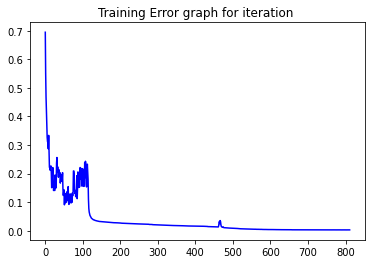

In [76]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error graph for iteration ")
plt.plot(range(training_itr), np.array(cost_array), color = 'blue' )

plt.show()


##Plot the testing error

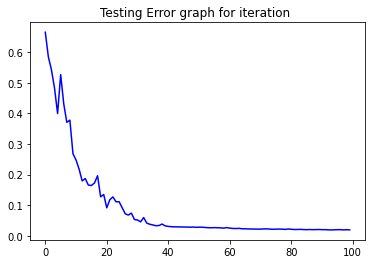

In [82]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Testing Error graph for iteration ")
plt.plot(range(test_itr), np.array(cost_array_test), color = 'blue' )

plt.show()

##Plot the training accuracy

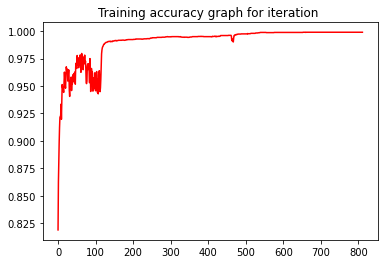

In [77]:
plt.title("Training accuracy graph for iteration ")
plt.plot(range(training_itr), np.array(accuracy_array), color = 'red' )

plt.show()

##Plot the testing accuracy

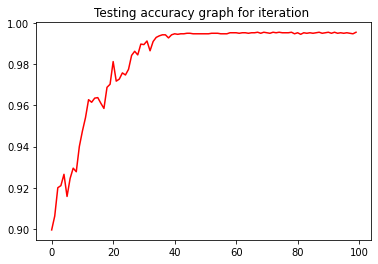

In [83]:
plt.title("Testing accuracy graph for iteration ")
plt.plot(range(test_itr), np.array(accuracy_array_test), color = 'red' )

plt.show()

##write down the final training accuracy

In [84]:
print("final training accurary : {}%".format(round(accuracy_array[training_itr-1], 3)*100))

final training accurary : 99.9%


##write down the final testing accuracy

In [87]:
print("final testing accurary : {}%".format(round(accuracy_array_test[test_itr-1], 3)*100))

final testing accurary : 99.6%


In [0]:
import pickle
with open('weights_t.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
      U = pickle.load(file)
      V = pickle.load(file)
      W = pickle.load(file)
      past_itr = pickle.load(file)
      accuracy_array_t = pickle.load(file)
      cost_array_t = pickle.load(file)

In [0]:
accuracy_array_test = accuracy_array_t
cost_array_test = cost_array_t

In [0]:
with open('weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array_test,file)
    pickle.dump(cost_array_test,file)

In [16]:
print("final accurary : {}%".format(round(accuracy_array_test[past_itr-1], 3)*100))

final accurary : 99.0%


##the classification example

In [0]:
correct_vector = np.zeros((size_row*size_col,10))
wrong_vector  = np.zeros((size_row*size_col,10))

indx = 0 #loop variable
ccount = 0 
wcount = 0 

for real, hypo in zip(test_label, predicted_label[:4000]):
  if ccount < 10 :
    if real == hypo:
      correct_vector[:,ccount] = test_images[:, indx]
      ccount += 1
  if wcount < 10:
    if real != hypo:
      wrong_vector[:,wcount] = test_images[:, indx]
      wcount += 1
  else: break
  indx = indx+1

In [90]:
indx

3017

##correct images

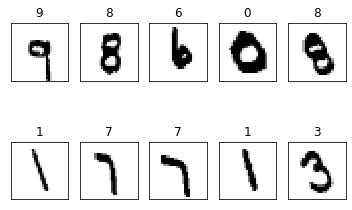

In [91]:
f3 = plt.figure(1)
for i in range(10):
  correct_matrix = correct_vector[:, i].reshape(size_row, size_col)

  plt.subplot(2, 5, i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.title(test_label[i])
  plt.imshow(correct_matrix, cmap='Greys', interpolation='None') 
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

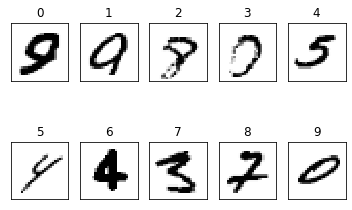

In [92]:
f4 = plt.figure(1)
for i in range(10):
  wrong_matrix = wrong_vector[:, i].reshape(size_row, size_col)

  plt.subplot(2, 5, i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.title(i)
  plt.imshow(wrong_matrix, cmap='Greys', interpolation='None') 
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)